In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from linna.main import ml_sampler,ml_sampler_core
from linna.util import *
%load_ext autoreload
%autoreload 2 
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this notebook, we sample a 2d gaussian posterior using LINNA. LINNA isn't designed for low dimension posteiors, so the performance will not be great. However, this notebook illustrates how one can use LINNA to sample posteriors. 

# Create a multivariate gaussian distribution 

In [4]:
ndim = 1
init =  np.random.uniform(size=ndim)
#mean value
means = np.array([0, 0.5])
ndim = len(init)
#covariance matrix
cov = np.diag([1, 1])

priors = []
for i in range(ndim):
    priors.append({
        'param': 'test_{0}'.format(i),
        'dist': 'flat',
        'arg1': -3,
        'arg2':3
    })
def theory(x, outdirs):
    x_new = deepcopy(x[1])
    return x_new
nwalkers = 8 #Number of mcmc walker


In [33]:
outdir = "/oak/stanford/orgs/kipac/users/chto/lighthouse/python/nnacc/2dgaussian/"


In [34]:
class newpools():
    def __init__(self, pool):
        self.pool = pool
    def map(self, x1, x2):
        return self.pool.map(x1, x2)
    def is_master(self):
        return True
pool = newpools(Pool(8))

Process ForkPoolWorker-55:
Process ForkPoolWorker-52:
Process ForkPoolWorker-54:
Process ForkPoolWorker-56:
Process ForkPoolWorker-49:
Process ForkPoolWorker-53:
Process ForkPoolWorker-51:
Process ForkPoolWorker-50:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/process.py", line

In [35]:
omegab2cut=None
nepoch=200
method="zeus"
nbest=None
chisqcut=None
loglikelihoodfunc=None
data=means

In [ ]:
ntrainArr = [100, 100, 1000, 10000]
nvalArr = [10,10,100,1000]

nkeepArr = [2, 2, 5, 5]
ntimesArr = [5, 5, 10, 50]
ntautolArr = [0.03, 0.03, 0.02, 0.01]
temperatureArr =  [4.0, 2.0, 1.0, 1.0]
meanshiftArr = [0.2, 0.2, 0.2, 0.2]
stdshiftArr = [0.15,0.15,0.15,0.15]

dolog10index = None
ypositive = False
device = "cuda"
docuda=False
tsize=1
nnmodel_in = ChtoModelv2
params = {}
params["trainingoption"] = 1
params["num_epochs"] = nepoch
params["batch_size"] = 500
chain, logprob= ml_sampler_core(ntrainArr, nvalArr, nkeepArr, ntimesArr, ntautolArr, meanshiftArr, stdshiftArr, outdir, theory, priors, data, cov,  init, pool, nwalkers, device, dolog10index, ypositive, temperatureArr, omegab2cut, docuda, tsize, gpunode, nnmodel_in, params, method, nbest=nbest, chisqcut=chisqcut, loglikelihoodfunc=loglikelihoodfunc)

####################################################################################################
iteration: 0
####################################################################################################


Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/pool.py", line 692, in _terminate_pool
    cls._help_stuff_finish(inqueue, task_handler, len(pool))
  File "/home/users/chto/miniconda3/envs/newenv4/lib/python3.9/multiprocessing/pool.py", line 672, in _help_stuff_finish
    inqueue._rlock.acquire()
KeyboardInterrupt: 


# Perform MCMC sampling using Linna

In [10]:
gpunode = None
chain, logprob = ml_sampler(outdir, theory, priors, means, cov, init, pool, nwalkers, gpunode)

####################################################################################################
iteration: 0
####################################################################################################


IndexError: list index out of range

# Check the result

In [58]:
import h5py
chainall={}
for i in [2,3,4,5]:
    chain = h5py.File("/oak/stanford/orgs/kipac/users/chto/lighthouse/python/nnacc/2dgaussian/iter_{0}/zeus_256.h5".format(i),'r')
    chain = chain['chain_transformed'][:][-10000:,:,:].reshape(-1,2)
    chainall[i]=chain
    print(chain.shape)

(80000, 2)
(80000, 2)
(79200, 2)
(80000, 2)


In [59]:
chain['chain_transformed'].shape

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [64]:
bins = np.linspace(-3,3,20)
bins_cent = 0.5*(bins[1:]+bins[:-1])
gau = 1/np.sqrt(2*np.pi*1)*np.exp(-1*(bins_cent-0.5)**2/2)

Text(0, 0.5, 'P(x)')

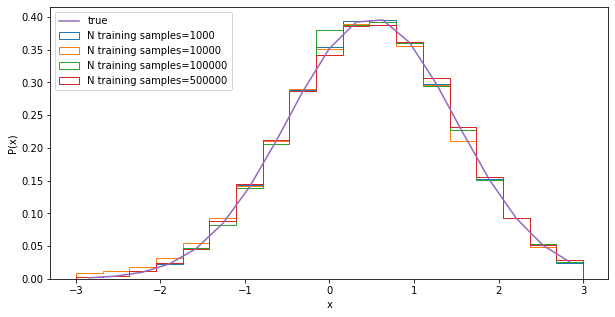

In [68]:
fig = plt.figure(figsize=(10,5))
Ntrain=[1000, 1000, 1000, 10000, 100000, 500000]
for i in [2,3,4,5]:
    chain=chainall[i]
    plt.hist((chain[:,1]), density=True, histtype="step", bins=np.linspace(-3,3,20), label="N training samples={0}".format(Ntrain[i]))
plt.plot(bins_cent, gau, label="true")
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")

In [40]:
chain_ref =  np.random.multivariate_normal(means, cov, len(chain)) #Reference point

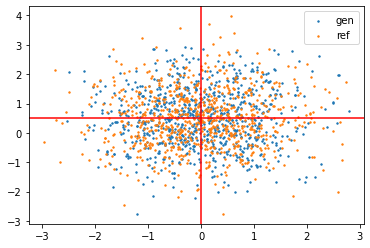

In [41]:
plt.scatter(chain[:,0], chain[:,1], label="gen",s=2)
plt.scatter(chain_ref[:,0], chain_ref[:,1], label="ref", s=2)
plt.legend()
plt.axvline(means[0], c="r")
plt.axhline(means[1], c="r")


# Useful performance check tools

The output of linna has the following struture.

In [2]:
path = os.path.abspath(os.getcwd())+"/out/2dgaussian/"
!tree $path

/home/users/chto/code/lighthouse/python/nnacc/nnacc/linna/linna/docs/notebooks/out/2dgaussian/
├── iter_0
│   ├── best.pth.tar
│   ├── finish.pkl
│   ├── last.pth.tar
│   ├── lr.npy
│   ├── lr_tunning.png
│   ├── model_args.pkl
│   ├── model_pickle.pkl
│   ├── train
│   ├── training_progress.png
│   ├── trainniing.png
│   ├── train_samples_x.txt
│   ├── train_samples_y.npy
│   ├── val
│   ├── val_samples_x.txt
│   ├── val_samples_y.npy
│   ├── X_transform.pkl
│   ├── y_invtransform_data.pkl
│   ├── y_invtransform.pkl
│   ├── y_transform_data.pkl
│   ├── y_transform.pkl
│   └── zeus_256.h5
├── iter_1
│   ├── best.pth.tar
│   ├── finish.pkl
│   ├── last.pth.tar
│   ├── lr.npy
│   ├── lr_tunning.png
│   ├── model_args.pkl
│   ├── model_pickle.pkl
│   ├── train
│   ├── training_progress.png
│   ├── trainniing.png
│   ├── train_samples_x.txt
│   ├── train_samples_y.npy
│   ├── val
│   ├── val_samples_x.txt
│   ├── val_samples_y.npy
│   ├── X_transform.pkl
│   ├── y_invtransform_data.pkl
│  

In each iteration, 

* `training_progress.png`: traning loss and validation loss as a function of training steps. 

* `last.pth.tar` and `best.pth.tar`: files store the weights of the neural network corresponding to the last step and the step corresponds to the minimal validation loss respectively. 

* `train_samples_x.txt` and `train_samples_y.npy`: files contain the training points and the corresponding model evaluations at those points. 

* `val_samples_x.txt` and `val_samples_y.npy`: files contain the validation points and the corresponding model evaluations at those points. 

* `*transform*.pkl`: corresponds to various transform of the data vector as described in the paper. 

Note that if your job crashs at an iteration, LINNA can be restarted from the previous iteration by cleanining the directories corresponding to the crashed iteration and rerunning the code. 

#### To retrieve the model 
One might wish to use the learned model to perform fast model evaluation. This can be done with the following functions. 

In [3]:
model = retrieve_model_wrapper_in(path+"iter_3/", no_grad=False)

In [4]:
indata=torch.from_numpy(np.array([2,2]).astype(np.float32)).clone().requires_grad_()
print("input:{0}, model prediction:{1}".format(indata, model(indata)))

input:tensor([2., 2.], requires_grad=True), model prediction:tensor([[2.0062, 2.0018]], grad_fn=<MulBackward0>)


In [7]:
print("gradient of model[0] at {0} is {1}".format(indata, torch.autograd.grad(model(indata)[0][0],indata)))

gradient of model[0] at tensor([2., 2.], requires_grad=True) is (tensor([0.9571, 0.0450]),)
